---
title: "Activity 5.2"
format:
  html:
    embed-resources: true
    code-fold: true
execute:
  echo: true
  warning: false
  message: false
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
from pandas import get_dummies
import pandas as pd

In [ ]:
# Code Here
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
penguins_cleaned = penguins.dropna()
penguins_dummies = pd.get_dummies(penguins_cleaned)
penguins_dummies.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [ ]:
from sklearn.model_selection import train_test_split


# Separate target variable (y) and predictor variables (X)
X = penguins_dummies.drop('bill_depth_mm', axis=1)
y = penguins_dummies['bill_depth_mm']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


Define four different models with varying sets of predictor variables and train them on the training data.



Import the LinearRegression model and define the predictor variable lists for the four models.



In [ ]:
from sklearn.linear_model import LinearRegression

# Define four different sets of predictor variables
model_vars = {
    'Model 1': ['bill_length_mm'],
    'Model 2': ['bill_length_mm', 'flipper_length_mm'],
    'Model 3': ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'],
    'Model 4': X_train.columns.tolist() # All variables
}

trained_models = {}

# Train a Linear Regression model for each set of variables
for model_name, predictors in model_vars.items():
    X_train_subset = X_train[predictors]
    model = LinearRegression()
    model.fit(X_train_subset, y_train)
    trained_models[model_name] = {'model': model, 'predictors': predictors}

print("Trained models:", trained_models.keys())

Trained models: dict_keys(['Model 1', 'Model 2', 'Model 3', 'Model 4'])



Calculating the training and testing error for each model using mean squared error.



In [ ]:
from sklearn.metrics import mean_squared_error

model_errors = {}

for model_name, model_info in trained_models.items():
    model = model_info['model']
    predictors = model_info['predictors']

    # Training error
    X_train_subset = X_train[predictors]
    y_train_pred = model.predict(X_train_subset)
    train_error = mean_squared_error(y_train, y_train_pred)

    # Testing error
    X_test_subset = X_test[predictors]
    y_test_pred = model.predict(X_test_subset)
    test_error = mean_squared_error(y_test, y_test_pred)

    model_errors[model_name] = {'train_error': train_error, 'test_error': test_error}

print(model_errors)

{'Model 1': {'train_error': 3.686664653109173, 'test_error': 3.60906485997953}, 'Model 2': {'train_error': 2.414925139596298, 'test_error': 2.4651834464225755}, 'Model 3': {'train_error': 2.3955607341061453, 'test_error': 2.479057480622072}, 'Model 4': {'train_error': 0.575746622308314, 'test_error': 0.7096268367368191}}


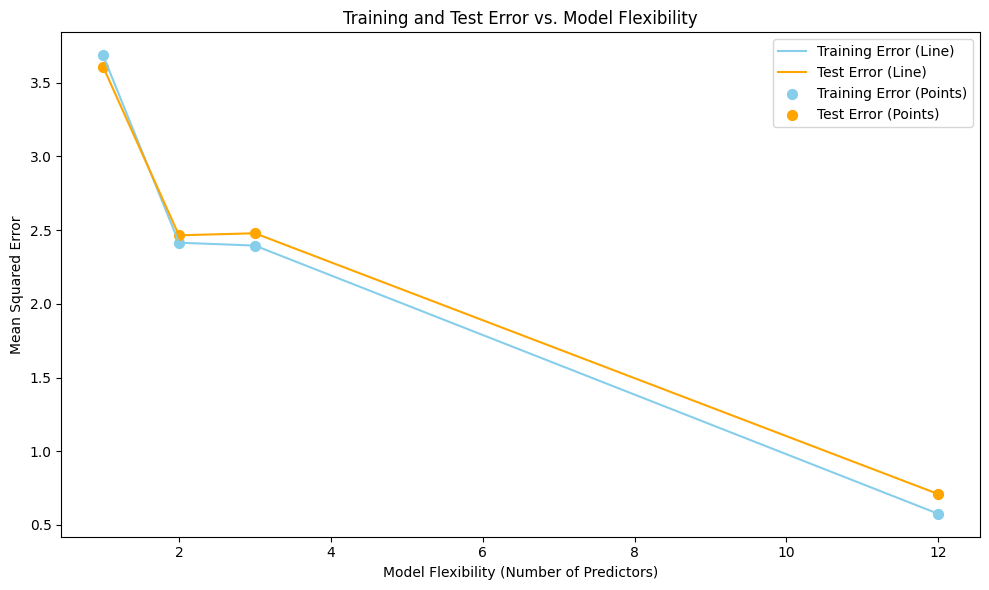

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = list(model_errors.keys())
train_errors = [model_errors[name]['train_error'] for name in model_names]
test_errors = [model_errors[name]['test_error'] for name in model_names]

# Get the number of predictors for each model to represent flexibility
model_flexibility = [len(trained_models[name]['predictors']) for name in model_names]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines connecting the points
ax.plot(model_flexibility, train_errors, color='skyblue', linestyle='-', linewidth=1.5, label='Training Error (Line)')
ax.plot(model_flexibility, test_errors, color='orange', linestyle='-', linewidth=1.5, label='Test Error (Line)')

# Plot scatter points for the actual data
ax.scatter(model_flexibility, train_errors, color='skyblue', s=50, label='Training Error (Points)')
ax.scatter(model_flexibility, test_errors, color='orange', s=50, label='Test Error (Points)')


ax.set_xlabel("Model Flexibility (Number of Predictors)")
ax.set_ylabel("Mean Squared Error")
ax.set_title("Training and Test Error vs. Model Flexibility")
ax.legend()
# ax.set_xscale('log') # Uncomment this line if you want a log scale on the x-axis
# ax.set_ylim(0, 2.5) # Uncomment this line to set a specific y-axis range
plt.tight_layout()
plt.show()

It looks like in this case it's good to have more predictors! Not suprising, training error goes down as we ad more prectors, but the important thing to see is the test error is also going down, staying very close to the training error